In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("adult.data2.csv")

In [3]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education-nume,Marital,Occupation,Relationship,Race,Sex,Capitalgain,Capitalloss,Hoursperweek,NativeCountry,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Removento os dados faltantes 

In [4]:
df_remove = df.loc[(df['Occupation'] == ' ?')]
df= df.drop(df_remove.index)
df['Workclass'].unique()
df_remove = df.loc[(df['NativeCountry'] == ' ?')]
df= df.drop(df_remove.index)

# Transfomação de quanlitativo em quantitativo



In [5]:
df['Workclass_n'] = df.Workclass.map({' State-gov':1, ' Self-emp-not-inc':2,' Private':3,' Federal-gov':4,
                                      ' Local-gov':5,' Self-emp-inc':6,' Without-pay':7 })

df['Marital_n'] = df.Marital.map({' Never-married':1,' Married-civ-spouse':2,' Divorced':3,' Married-spouse-absent':4,
                                         ' Separated':5,' Married-AF-spouse':6,' Widowed':7 })

df['Occupation_n'] = df.Occupation.map({' Adm-clerical':1,' Exec-managerial':2,' Handlers-cleaners':3,' Prof-specialty':4,
                                         ' Other-service':5,' Sales':6,' Craft-repair':7,' Transport-moving':8,
                                        ' Farming-fishing':9,' Machine-op-inspct':10,' Tech-support':11,' Protective-serv':12,
                                        ' Armed-Forces':13,' Priv-house-serv':14 })

df['Relationship_n'] = df.Relationship.map({' Not-in-family':1,' Husband':2,' Wife':3,' Own-child':4,
                                         ' Unmarried':5,' Other-relative':6 })

df['Sex_n'] = df.Sex.map({' Female':2, ' Male':1})

df['Race_n'] = df.Race.map({' White':1,' Black':2,' Asian-Pac-Islander':3,' Amer-Indian-Eskimo':4,' Other':5 })

df['NativeCountry_n'] = df.NativeCountry.map({' United-States':1,' Cuba':2,' Jamaica':3,' India':4,' Mexico':5,' South':6,
                                        ' Puerto-Rico':7,' Honduras':8,' England':9,' Canada':10,' Germany':11,' Iran':12,
                                        ' Philippines':13,' Italy':14,' Poland':15,' Columbia':16,' Cambodia':17,' Thailand':18,
                                        ' Ecuador':19,' Laos':20,' Taiwan':21,' Haiti':22,' Portugal':23,' Dominican-Republic':24,
                                        ' El-Salvador':25,' France':26,' Guatemala':27,' China':28,' Japan':29,' Yugoslavia':30,
                                        ' Peru':31,' Outlying-US(Guam-USVI-etc)':32,' Scotland':33,' Trinadad&Tobago':34,
                                        ' Greece':35,' Nicaragua':36,' Vietnam':37,' Hong':38,' Ireland':39,' Hungary':40,
                                        ' Holand-Netherlands':41})

df['Result_n'] = df.Result.map({' <=50K':1, ' >50K':2})



# Excluindo atributos

In [6]:
df.drop(['Education','Fnlwgt','Capitalgain','Capitalloss','Sex','Workclass','Relationship','Race',
         'Result','Marital','Occupation','NativeCountry'], axis=1, inplace=True)

In [7]:
df.head(20)

,Age,Education-nume,Hoursperweek,Workclass_n,Marital_n,Occupation_n,Relationship_n,Sex_n,Race_n,NativeCountry_n,Result_n
0,39,13,40,1,1,1,1,1,1,1,1
1,50,13,13,2,2,2,2,1,1,1,1
2,38,9,40,3,3,3,1,1,1,1,1
3,53,7,40,3,2,3,2,1,2,1,1
4,28,13,40,3,2,4,3,2,2,2,1
5,37,14,40,3,2,2,3,2,1,1,1
6,49,5,16,3,4,5,1,2,2,3,1
7,52,9,45,2,2,2,2,1,1,1,2
8,31,14,50,3,1,4,1,2,1,1,2
9,42,13,40,3,2,2,2,1,1,1,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 11 columns):
Age                30162 non-null int64
Education-nume     30162 non-null int64
Hoursperweek       30162 non-null int64
Workclass_n        30162 non-null int64
Marital_n          30162 non-null int64
Occupation_n       30162 non-null int64
Relationship_n     30162 non-null int64
Sex_n              30162 non-null int64
Race_n             30162 non-null int64
NativeCountry_n    30162 non-null int64
Result_n           30162 non-null int64
dtypes: int64(11)
memory usage: 2.8 MB


In [25]:
X = df.iloc[:,1:11]
y = df.iloc[:, 0]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

C:\Users\P90\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\P90\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.12891838, -0.07773411, -2.25653747, ..., -0.34586067,
        -0.239013  , -0.57569132],
       [ 1.12891838, -2.3315307 , -1.18675527, ..., -0.34586067,
        -0.239013  , -0.57569132],
       [-0.4397382 , -0.07773411, -0.11697307, ..., -0.34586067,
        -0.239013  , -0.57569132],
       ...,
       [-0.4397382 , -0.07773411, -0.11697307, ..., -0.34586067,
        -0.239013  , -0.57569132],
       [-0.4397382 , -1.74721307, -0.11697307, ..., -0.34586067,
        -0.239013  , -0.57569132],
       [-0.4397382 , -0.07773411,  3.09237353, ..., -0.34586067,
        -0.239013  ,  1.73704199]])

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-0.83098383, -0.27683342, -0.67929215, ...,  0.26310428,
        -0.34332577, -0.77198735],
       [ 0.40065122, -0.725373  , -0.8969564 , ..., -1.0513082 ,
        -0.49251428, -1.41895048],
       [-0.2649791 ,  0.20587834, -0.50261691, ...,  0.12492564,
        -0.91141144, -0.48040643],
       ...,
       [ 2.21308003, -2.31423825, -0.42267301, ...,  0.50039094,
        -0.93950372, -0.85715607],
       [ 1.11102028, -0.43988202, -0.78973192, ...,  0.0192068 ,
        -1.45111784, -0.71466059],
       [-0.39342616, -2.13011143,  0.2582076 , ...,  0.15831823,
        -0.40554814,  1.7264489 ]])

In [31]:
pca.get_covariance()


array([[ 1.00003316,  0.15252713,  0.06273152, -0.06165812, -0.24496836,
        -0.14272345, -0.00615706, -0.043077  , -0.0684499 ,  0.33529731],
       [ 0.15252713,  1.00003316,  0.06388623,  0.01717953,  0.04022191,
        -0.19452783, -0.23127579, -0.03758684, -0.01314403,  0.22948774],
       [ 0.06273152,  0.06388623,  1.00003316,  0.02500813, -0.04052931,
        -0.00720933, -0.0056518 ,  0.00141357, -0.01038238,  0.09515974],
       [-0.06165812,  0.01717953,  0.02500813,  1.00003316, -0.00974645,
         0.04991452,  0.17805085,  0.0172265 ,  0.00306551,  0.00745923],
       [-0.24496836,  0.04022191, -0.04052931, -0.00974645,  1.00003316,
        -0.0468824 , -0.21305429,  0.00706491,  0.02407236, -0.07978902],
       [-0.14272345, -0.19452783, -0.00720933,  0.04991452, -0.0468824 ,
         1.00003316,  0.27542821,  0.09966812,  0.04296398, -0.16899855],
       [-0.00615706, -0.23127579, -0.0056518 ,  0.17805085, -0.21305429,
         0.27542821,  1.00003316,  0.06753081

In [32]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.18578624, 0.1402052 , 0.1211475 , 0.10514721, 0.09602492,
       0.08007637, 0.07629872, 0.07498351, 0.06554754, 0.0547828 ])

In [36]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[-0.83098383, -0.27683342, -0.67929215, -2.29503073, -1.78494087],
       [ 0.40065122, -0.725373  , -0.8969564 , -1.75162764, -0.76189758],
       [-0.2649791 ,  0.20587834, -0.50261691,  0.37148816, -0.49104259],
       ...,
       [ 2.21308003, -2.31423825, -0.42267301,  3.02062614, -1.60731041],
       [ 1.11102028, -0.43988202, -0.78973192, -1.52371344,  0.80256144],
       [-0.39342616, -2.13011143,  0.2582076 ,  1.31122067,  2.51168137]])

In [38]:
pca.get_covariance()

array([[ 1.05034617,  0.14958081,  0.06755913, -0.04371435, -0.23787343,
        -0.13133737, -0.03672538, -0.05506208, -0.05525817,  0.28460462],
       [ 0.14958081,  0.96275782,  0.06885534,  0.02304668,  0.04852054,
        -0.22136386, -0.22348709, -0.04195599, -0.00304476,  0.24906452],
       [ 0.06755913,  0.06885534,  0.99672228,  0.02418987, -0.03538093,
         0.00871175, -0.00939436,  0.00247039, -0.01395957,  0.09800047],
       [-0.04371435,  0.02304668,  0.02418987,  1.00956298, -0.01575548,
         0.06936769,  0.15122322,  0.01741432,  0.00113163, -0.01568684],
       [-0.23787343,  0.04852054, -0.03538093, -0.01575548,  1.00698963,
        -0.06888259, -0.19079944, -0.00224192,  0.0358677 , -0.09592158],
       [-0.13133737, -0.22136386,  0.00871175,  0.06936769, -0.06888259,
         0.94458953,  0.25931722,  0.09977308,  0.05436666, -0.21338403],
       [-0.03672538, -0.22348709, -0.00939436,  0.15122322, -0.19079944,
         0.25931722,  1.05976323,  0.06675137

In [ ]:
explained_variance

In [39]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.18578624, 0.1402052 , 0.1211475 , 0.10514721, 0.09602492])

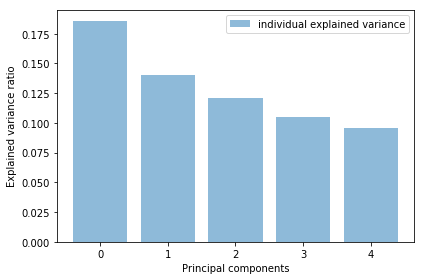

In [45]:
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(24129, 10)

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [49]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.33502667371558015, 0.35279915235417514, 0.3503200094379526, 0.3561616029053497, 0.3569332959366798, 0.35672840750130297, 0.3608211643832132, 0.3574451924816925, 0.35803838087914186, 0.3619384762340412, 0.3593308858806644, 0.36114870820253586, 0.36236047193314247, 0.3618284411173409, 0.35960602527555485, 0.36055165961040136, 0.36202891404702153, 0.3600201842943047, 0.3630607962336967]


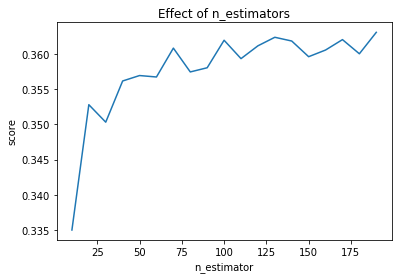

In [50]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

(24129, 5)

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [53]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

[0.31900591151513147, 0.332590882170847, 0.3378396437327522, 0.3432045231870574, 0.337082421646658, 0.34282381231337467, 0.345158125051507, 0.3400638680420398, 0.3461075823266955, 0.3468301521821079, 0.3479668505692459, 0.348158111263408, 0.3463332026347179, 0.3465808348667173, 0.34562323166901465, 0.3495744719109495, 0.3470406615044195, 0.34815784627581803, 0.347196380082998]


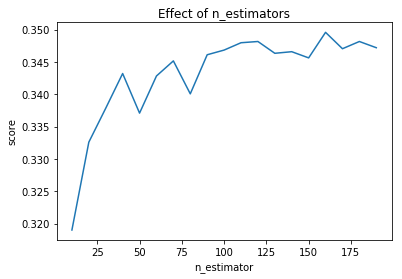

In [54]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Subtitle
 
    Workclass               Workclass_n                       Occupation                Occupation_n                                                                          
    State-gov               1                                 Adm-clerical              1                             
    Self-emp-not-inc        2                                 Exec-managerial           2
    Private                 3                                 Handlers-cleaners         3
    Federal-gov             4                                 Prof-specialty            4
    Local-gov               5                                 Other-service             5
    Self-emp-inc            6                                 Sales                     6
    Without-pay             7                                 Craft-repair              7
                                                              Transport-moving          8
    Education               Education-nume                    Farming-fishing           9                        
                                                              Machine-op-inspct         10 
    Bachelors               1                                 Tech-support              11
    HS-grad                 2                                 Protective-serv           12
    11th                    3                                 Armed-Forces              13
    Masters                 4                                 Priv-house-serv           14
    9th                     5
    Some-college            6                                 Relationship              Relationship_n
    Assoc-acdm              9
    Assoc-voc               10                                Not-in-family             1                   
    7th-8th                 11                                Husband                   2
    Doctorate               12                                Wife                      3 
    Prof-school             13                                Own-child                 4
    5th-6th                 14                                Unmarried                 5
    10th                    15                                Other-relative            6
    Preschool               16
    12th                    17                                Race                      Race
    1st-4th                 18
                                                              White                     1
    Marital                  Marital_n                        Black                     2
                                                              Asian-Pac-Islander        3
    Never-married            1                                Amer-Indian-Eskimo        4
    Married-civ-spouse       2                                Other                     5
    Divorced'                3
    Married-spouse-absent    4                                Sex                       Sex_n
    Separated                5                                
    Married-AF-spouse        6                                Male                      1
    Widowed                  7                                Female                    2

    
    NativeCountry              NativeCountry_n                Result                    Label
    
    United-States              1                              <=50K                     1
    Cuba                       2                              >50K                      2
    Jamaica                    3
    India                      4
    Mexico                     5
    Puerto-Rico                6
    Honduras                   7 
    England                    8
    Canada                     9
    Germany                    10 
    Iran                       11
    Philippines                12
    Poland                     13 
    Columbia                   14
    Cambodia                   15
    Thailand                   16
    Ecuador                    17
    Laos                       18
    Taiwan                     19
    Haiti                      20
    Portugal                   21
    Dominican-Republic         22
    El-Salvador                23
    France                     24
    Guatemala                  25
    Italy                      26
    China                      27
    South                      28
    Japan                      29
    Yugoslavia                 30  
    Peru                       31
    Outlying-US(Guam-USVI-etc) 32
    Scotland                   33
    Trinadad&Tobago            34  
    Greece                     35
    Nicaragua                  36
    Vietnam                    37
    Hong                       38
    Ireland                    39
    Hungary                    40
    Holand-Netherlands         41



